<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

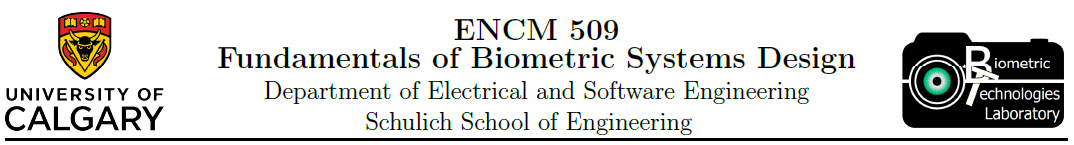

# Lab 2 report

| Student name | UCID |
| -------------|----:|
| Rian Opperman | 30118288 |
|Mohammed Alshoura | 30126200|

## Introduction

This lab's purpose is to develop familiarity with signature data acquisition, as well as statistical analysis of the acquired data, which are key steps to the overall biometric design of a verification or recognition system. In this lab we used a pen tablet to draw signatures and record their pressure values, as well as the x, y and time values (for calculating the velocity of our signature) while we wrote our signature.

> *Note: Due to the pen tablet malfunctioning during the lab, we are unable to use our recorded signatures as the pressure data was recorded as a constant 0. We instead used the 'biometrics' sample dataset for our analysis.*

## Exercise 1

Text(0.5, 0, 'Population values')

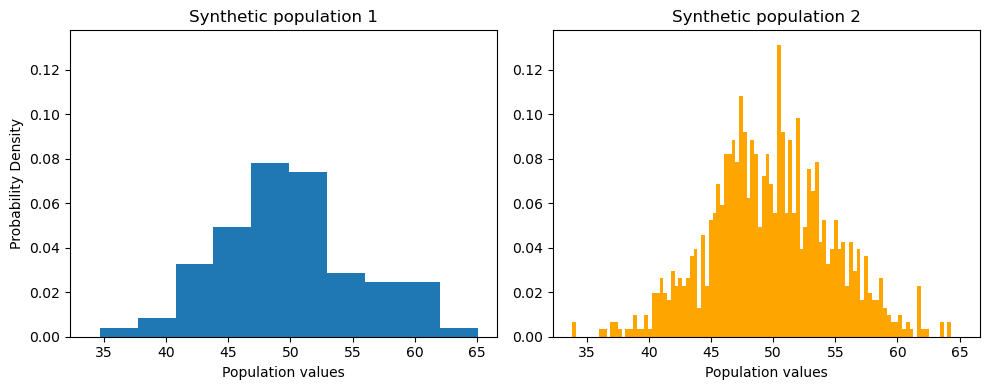

In [2]:
# Theoretical Mean and Std
mu = 50
std = 5
qtt_samples = 80

pop_norm_1 = norm.rvs(mu, std, size=qtt_samples)
pop_norm_2 = norm.rvs(mu, std, 1000)

plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
plt.hist(pop_norm_1, density=True)
plt.title("Synthetic population 1")
plt.ylabel("Probability Density")
plt.xlabel("Population values")

plt.subplot(1,2,2, sharex=ax1, sharey=ax1)
plt.hist(pop_norm_2, bins=100, density=True, color='orange')
plt.title("Synthetic population 2")
plt.xlabel("Population values")

Text(0.5, 0, 'Population values')

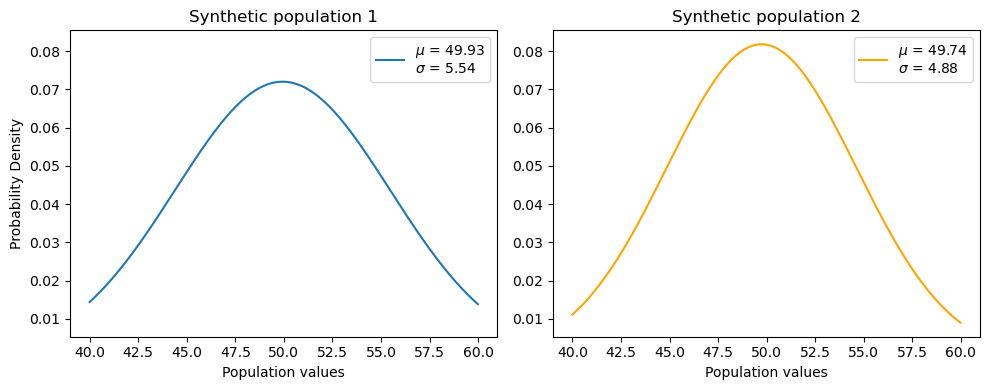

In [3]:
x = np.arange(40, 60, 0.01)
yticks = np.arange(np.min(pop_norm_1), np.max(pop_norm_1), 0.01)

mu_pop_1 = np.mean(pop_norm_1)
mu_pop_2 = np.mean(pop_norm_2)
std_pop_1 = np.std(pop_norm_1)
std_pop_2 = np.std(pop_norm_2)

pop_pdf_1 = norm.pdf(x, mu_pop_1, std_pop_1)
pop_pdf_2 = norm.pdf(x, mu_pop_2, std_pop_2)

plt.figure(figsize=(10,4))

ax2 = plt.subplot(1,2,1)
plt.plot(x, pop_pdf_1)
plt.legend([f"$\\mu$ = {mu_pop_1:.2f}\n$\\sigma$ = {std_pop_1:.2f}"])
plt.title("Synthetic population 1")
plt.ylabel("Probability Density")
plt.xlabel("Population values")

plt.subplot(1,2,2, sharex=ax2, sharey=ax2)
plt.plot(x, pop_pdf_2, 'orange')
plt.legend([f"$\\mu$ = {mu_pop_2:.2f}\n$\\sigma$ = {std_pop_2:.2f}"])
plt.title("Synthetic population 2")
plt.xlabel("Population values")

Text(0.5, 0, 'Population values')

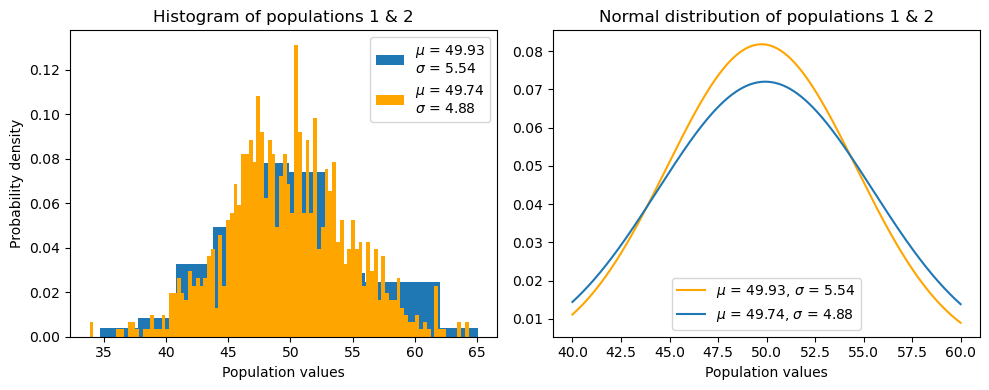

In [4]:
plt.figure(figsize=(10,4))

ax2 = plt.subplot(1,2,1)
plt.hist(pop_norm_1, density=True)
plt.hist(pop_norm_2, bins=100, density=True, color='orange')
plt.legend([f"$\\mu$ = {mu_pop_1:.2f}\n$\\sigma$ = {std_pop_1:.2f}", f"$\\mu$ = {mu_pop_2:.2f}\n$\\sigma$ = {std_pop_2:.2f}"])
plt.title("Histogram of populations 1 & 2")
plt.xlabel("Population values")
plt.ylabel("Probability density")

plt.subplot(1,2,2)
plt.plot(x, pop_pdf_2, color='orange')
plt.plot(x, pop_pdf_1)
plt.legend([f"$\\mu$ = {mu_pop_1:.2f}, $\\sigma$ = {std_pop_1:.2f}", f"$\\mu$ = {mu_pop_2:.2f}, $\\sigma$ = {std_pop_2:.2f}"])
plt.title("Normal distribution of populations 1 & 2")
plt.xlabel("Population values")

### Analysis

Comparing the calculations and graphs produced above, we can see that with more samples we reduce the variability in our data and arrive closer to the 'true' mean and standard deviation. For example, the 80 sample data set's standard deviation is farther from the true value of 5 than the 1000 sample data set. As well, the 1000 sample data set generally is closer to the true mean of 50 than the 80 sample data set, showing that with more data points the data set 'stabilizes' and the sample mean and deviation approaches the true population mean and deviation. However, variability in generating the data set does sometimes lead to the 80 sample data set being closer to the 'true' mean.

Additionally, when considering the histograms produced and the differing amount of 'bins' used, we can see that generally when using more bins we achieve greater fidelity in our data and arrive at an almost Normal distribution like shape. However, when more bins are used outliers and noise in the dataset are more prominent, causing difficulties in analysis. This helps further strengthen the inherent connection between the Probability Density function and the frequency of values in the dataset.

## Exercise 2

In [5]:
# As stated in the introduction, we are using the Biometrics
# sample data as our pen tablet corrupted the pressure values
# and saved the pressure as a constant value.

subdir = 'impostor/'
data_dir = 'signature_samples/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '21.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

csv_file.head()

,X,Y,Pressure,Time
0,86.103801,68.845620,0.013672,0
1,86.103801,67.830876,0.113498,2
2,86.103801,68.845620,0.046937,2
3,86.103801,67.830876,0.148717,15
4,86.103801,67.830876,0.148717,15


In [6]:
# To correctly map the pressure into the colormap, normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = plt.get_cmap('jet', np.max(prs1)+1)

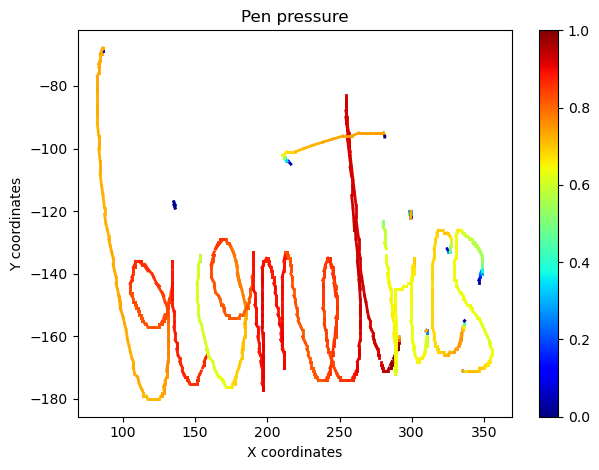

In [7]:
fig, ax = plt.subplots()

for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        ax.plot(coord1[i:i+2, 0], -coord1[i:i+2, 1], linewidth=2, color=c)

plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax=ax)

plt.show()

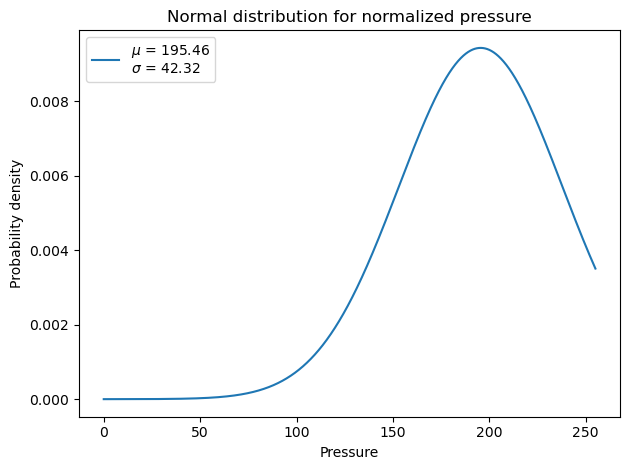

In [8]:
prs1_arranged = np.arange(prs1.min(), prs1.max(), 0.01)

mu_prs1 = np.mean(prs1)
std_prs1 = np.std(prs1)

prs1_pdf = norm.pdf(prs1_arranged, mu_prs1, std_prs1)


plt.plot(prs1_arranged, prs1_pdf)
plt.legend([f"$\\mu$ = {mu_prs1:.2f}\n$\\sigma$ = {std_prs1:.2f}"])
plt.title("Normal distribution for normalized pressure")
plt.ylabel("Probability density")
plt.xlabel("Pressure")
plt.show()

## Exercise 3

#### Below is the code to calculate velocity and plot velocity map of one signature: Explain why do we check for the condition if time_diff != 0:?

The check is done to avoid dividing by zero, as it would cause errors. If two consecutive rows (measurements) are taken close enough to each other, they would show up with the same time value, making `time_diff` equal to zero and causing a division by zero error.

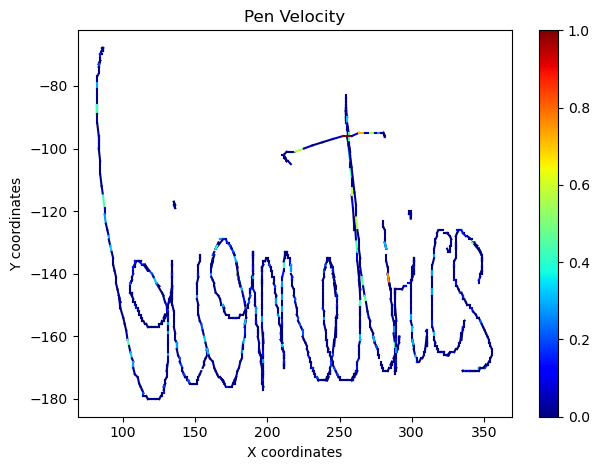

In [9]:
vel = np.zeros((len(time1)-1, 1))
fig, ax = plt.subplots()
for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i].item() * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = plt.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        ax.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Pen Velocity')
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm, ax = ax)
plt.show()

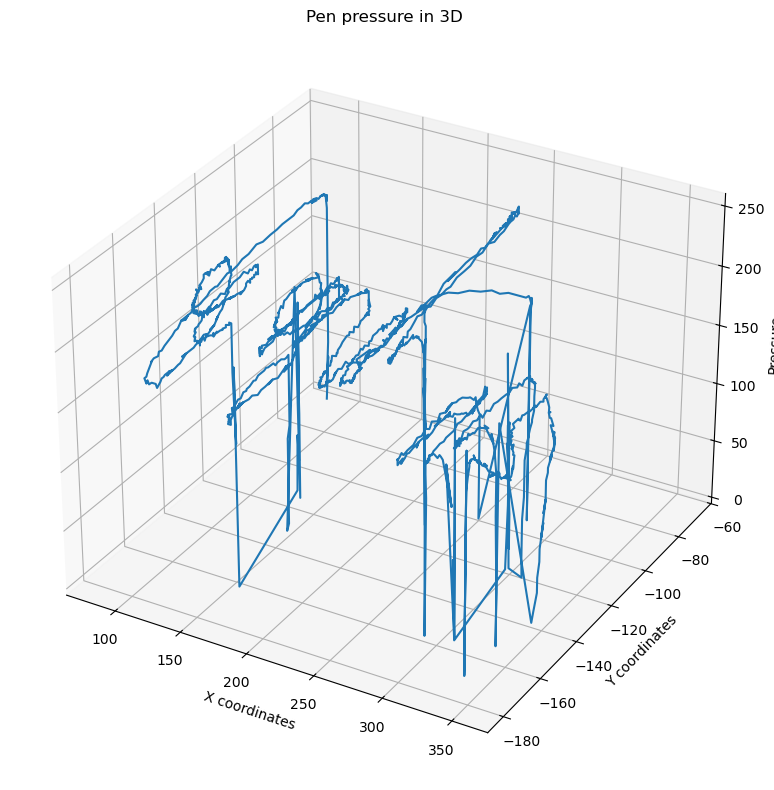

In [10]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X coordinates')
ax.set_ylabel('Y coordinates')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D')
plt.show()

## Exercise 4

In [11]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i].item() * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [12]:
base_dataset = "biometrics"
subdir = "genuine"
data_dir = f'signature_samples/{base_dataset}/{subdir}'

genuine_pressures = np.zeros((30, 2))
genuine_velocity = np.zeros((30, 2))

for i in range(30):
    csv_file = pd.read_csv(f"{data_dir}/{i+1}.csv")
    
    coords = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coords)
    
    prs = prs / np.max(prs) * 255
    prs = prs.astype(int)

    genuine_velocity[i, 0] = np.mean(vel)
    genuine_velocity[i, 1] = np.std(vel)

    genuine_pressures[i, 0] = np.mean(prs)
    genuine_pressures[i, 1] = np.std(prs)


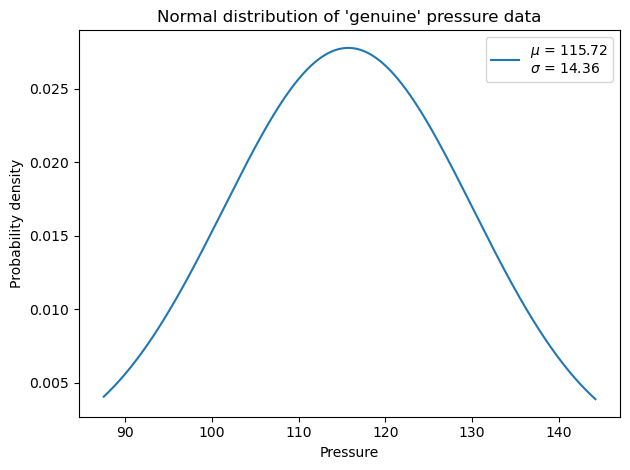

In [13]:
means_array = genuine_pressures[:,0]

arranged_genuine_pressures = np.arange(min(means_array), max(means_array), 0.01)
genuine_pressure_mean = np.mean(means_array)
genuine_pressure_std = np.std(means_array)

genuine_pressure_pdf = norm.pdf(arranged_genuine_pressures, genuine_pressure_mean, genuine_pressure_std)

plt.plot(arranged_genuine_pressures, genuine_pressure_pdf)
plt.title("Normal distribution of 'genuine' pressure data")
plt.legend([f"$\\mu$ = {genuine_pressure_mean:.2f}\n$\\sigma$ = {genuine_pressure_std:.2f}"])
plt.xlabel('Pressure')
plt.ylabel('Probability density')
plt.show()

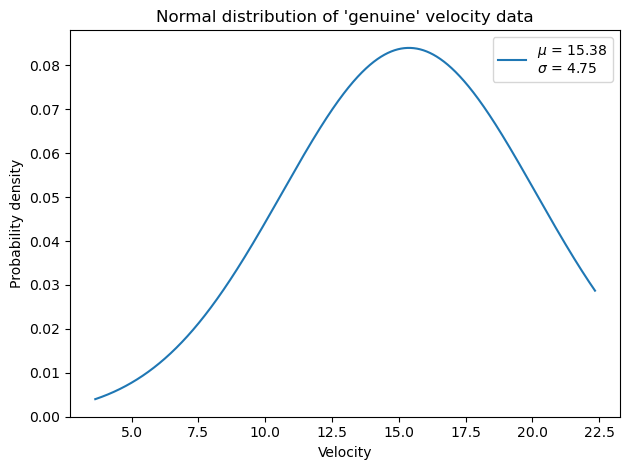

In [14]:
means_array = genuine_velocity[:,0]

arranged_genuine_velocity = np.arange(min(means_array), max(means_array), 0.01)
genuine_velocity_mean = np.mean(means_array)
genuine_velocity_std = np.std(means_array)

genuine_velocity_pdf = norm.pdf(arranged_genuine_velocity, genuine_velocity_mean, genuine_velocity_std)

plt.plot(arranged_genuine_velocity, genuine_velocity_pdf)
plt.title("Normal distribution of 'genuine' velocity data")
plt.legend([f"$\\mu$ = {genuine_velocity_mean:.2f}\n$\\sigma$ = {genuine_velocity_std:.2f}"])
plt.xlabel('Velocity')
plt.ylabel('Probability density')
plt.show()

## Exercise 5

In [15]:
base_dataset = "biometrics"
subdir = "impostor"
data_dir = f'signature_samples/{base_dataset}/{subdir}'

impostor_pressures = np.zeros((30, 2))
impostor_velocity = np.zeros((30, 2))

for i in range(30):
    csv_file = pd.read_csv(f"{data_dir}/{i+1}.csv")
    
    coords = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coords)
    
    prs = prs / np.max(prs) * 255
    prs = prs.astype(int)

    impostor_velocity[i, 0] = np.mean(vel)
    impostor_velocity[i, 1] = np.std(vel)

    impostor_pressures[i, 0] = np.mean(prs)
    impostor_pressures[i, 1] = np.std(prs)

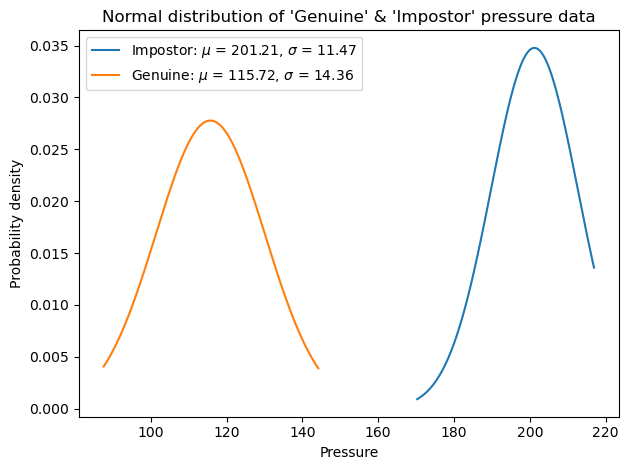

In [16]:
means_array = impostor_pressures[:,0]

arranged_impostor_pressures = np.arange(min(means_array), max(means_array), 0.01)
impostor_pressure_mean = np.mean(means_array)
impostor_pressure_std = np.std(means_array)

impostor_pressure_pdf = norm.pdf(arranged_impostor_pressures, impostor_pressure_mean, impostor_pressure_std)

plt.plot(arranged_impostor_pressures, impostor_pressure_pdf)
plt.plot(arranged_genuine_pressures, genuine_pressure_pdf)
plt.title("Normal distribution of 'Genuine' & 'Impostor' pressure data")
plt.legend([f"Impostor: $\\mu$ = {impostor_pressure_mean:.2f}, $\\sigma$ = {impostor_pressure_std:.2f}",
            f"Genuine: $\\mu$ = {genuine_pressure_mean:.2f}, $\\sigma$ = {genuine_pressure_std:.2f}"])
plt.xlabel('Pressure')
plt.ylabel('Probability density')
plt.show()

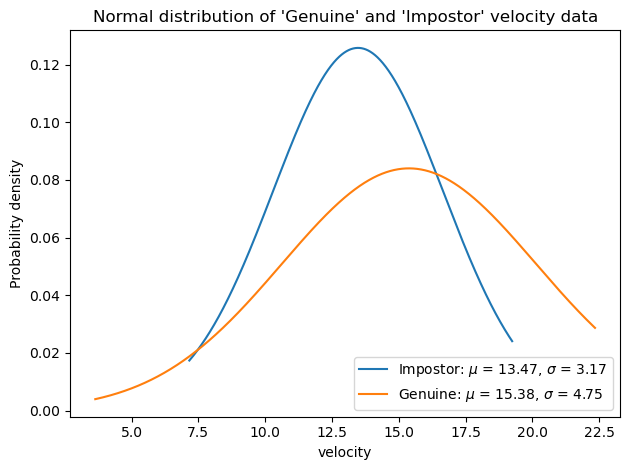

In [17]:
means_array = impostor_velocity[:,0]

arranged_impostor_velocity = np.arange(min(means_array), max(means_array), 0.01)
impostor_velocity_mean = np.mean(means_array)
impostor_velocity_std = np.std(means_array)

impostor_velocity_pdf = norm.pdf(arranged_impostor_velocity, impostor_velocity_mean, impostor_velocity_std)

plt.plot(arranged_impostor_velocity, impostor_velocity_pdf)
plt.plot(arranged_genuine_velocity, genuine_velocity_pdf)
plt.title("Normal distribution of 'Genuine' and 'Impostor' velocity data")
plt.legend([f"Impostor: $\\mu$ = {impostor_velocity_mean:.2f}, $\\sigma$ = {impostor_velocity_std:.2f}",
            f"Genuine: $\\mu$ = {genuine_velocity_mean:.2f}, $\\sigma$ = {genuine_velocity_std:.2f}"])
plt.xlabel('velocity')
plt.ylabel('Probability density')
plt.show()

### Analysis

The difference between the 'genuine' and 'impostor' distributions are quite large, especially for the pressure characteristic. As can be seen in the graph of the pressure distributions, they each center around a vastly different mean; the 'genuine' mean being 115.72 while the 'impostor' mean is 201.21. This difference creates a very distinct mechanism for classifying an individual as 'genuine' or 'impostor' through just the mean alone. As well, the standard deviations differ, but not by much, e.g. 14.36 vs. 11.47, so it is not as much of a distinguishing factor as the mean in this case.

Moving on to the velocity distributions, although they overlap one another the graphs themselves show that the peaks of the distributions differ; the 'genuine' having a higher probability density peak than the 'impostor' distribution. As well, the mean and standard deviation do differ, although only slightly with one another. However, the overlap does generally signify that the 'genuine' and 'impostor' velocity values are quite close to one another, meaning velocity is not as good of a distinguishing factor as pressure.

## Conclusion

From this lab we can see that there is a wide variety of data we can gather for something as simple as writing a signature. In this lab we used the pressure and calculated velocity values to help characterize a signature, instead of more visually recognizable features, such as the image of the signature itself. From this collected data of both 'genuine' and 'impostor' signatures we performed statistical analysis and determined that there can be quite stark differences in the input data, which can be used to help verify or recognize a signature. With this information, we can now perform an efficient method of verification or recognition of a signature, while gaining a deeper understanding of the process of data acquisition and statistical analysis which is crucial to biometric system design.